In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

## Data Loading

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
X_train, X_test = X_train/255., X_test/255.
y_train,y_test = y_train.flatten(),y_test.flatten()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [4]:
num_of_class = len(set(y_train))
print(f'Number of classes: {num_of_class}')

Number of classes: 10


## Model

In [0]:
i = Input(shape=(X_train[0].shape))
x = Conv2D(32,kernel_size=(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,kernel_size=(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,kernel_size=(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(num_of_class,activation='softmax')(x)

model = Model(i,x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5430 - accuracy: 0.4376 - val_loss: 1.2916 - val_accuracy: 0.5301
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2470 - accuracy: 0.5503 - val_loss: 1.1196 - val_accuracy: 0.6008
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1189 - accuracy: 0.5997 - val_loss: 1.0293 - val_accuracy: 0.6314
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0255 - accuracy: 0.6346 - val_loss: 0.9458 - val_accuracy: 0.6633
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9577 - accuracy: 0.6600 - val_loss: 0.9110 - val_accuracy: 0.6857
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8946 - accuracy: 0.6803 - val_loss: 0.8987 - val_accuracy: 0.6858
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8440 - accuracy: 0.6999 - val_loss: 0.8583 - val_accuracy:

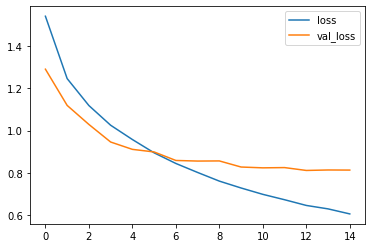

In [8]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()

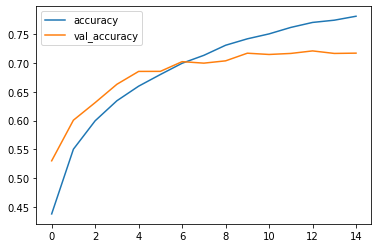

In [9]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()

In [12]:
pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.86      0.83      0.84      1000
           2       0.69      0.51      0.59      1000
           3       0.59      0.44      0.50      1000
           4       0.59      0.77      0.66      1000
           5       0.67      0.54      0.60      1000
           6       0.70      0.85      0.77      1000
           7       0.73      0.80      0.76      1000
           8       0.82      0.85      0.84      1000
           9       0.76      0.85      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



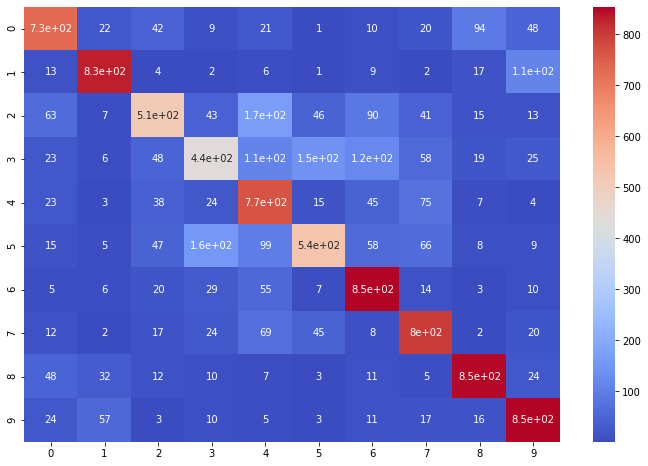

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='coolwarm')

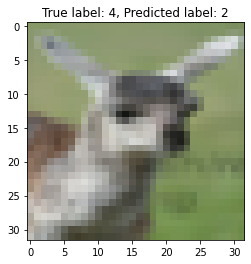

In [17]:
miss_class_idx = np.where(pred != y_test)[0]
i = np.random.choice(miss_class_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title(f"True label: {y_test[i]}, Predicted label: {pred[i]}")
plt.show()

## Model with Batch Normalization

In [0]:
i = Input(shape=(X_train[0].shape))

x = Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,kernel_size=(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size=(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,kernel_size=(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,kernel_size=(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(num_of_class,activation='softmax')(x)

model = Model(i,x)

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2982 - accuracy: 0.5488 - val_loss: 1.1078 - val_accuracy: 0.6115
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8434 - accuracy: 0.7074 - val_loss: 1.0893 - val_accuracy: 0.6487
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6939 - accuracy: 0.7598 - val_loss: 0.7335 - val_accuracy: 0.7555
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5787 - accuracy: 0.8016 - val_loss: 0.6793 - val_accuracy: 0.7795
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4983 - accuracy: 0.8286 - val_loss: 0.6705 - val_accuracy: 0.7775
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4248 - accuracy: 0.8544 - val_loss: 0.6191 - val_accuracy: 0.8097
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3598 - accuracy: 0.8756 - val_loss: 0.5880 - val_accuracy:

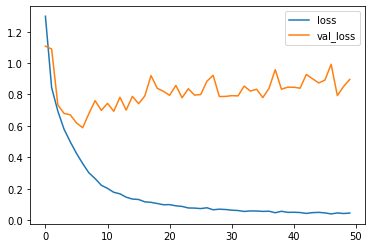

In [23]:
losses_imp = pd.DataFrame(model.history.history)
plt.plot(losses_imp['loss'],label='loss')
plt.plot(losses_imp['val_loss'],label='val_loss')
plt.legend()

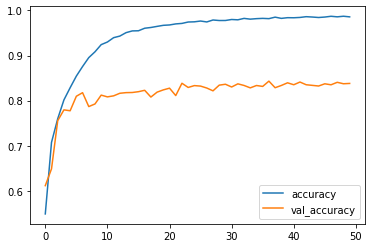

In [24]:
plt.plot(losses_imp['accuracy'],label='accuracy')
plt.plot(losses_imp['val_accuracy'],label='val_accuracy')
plt.legend()

In [25]:
pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.89      0.95      0.92      1000
           2       0.75      0.77      0.76      1000
           3       0.72      0.67      0.70      1000
           4       0.83      0.79      0.81      1000
           5       0.80      0.76      0.78      1000
           6       0.84      0.90      0.87      1000
           7       0.89      0.87      0.88      1000
           8       0.92      0.91      0.91      1000
           9       0.89      0.91      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



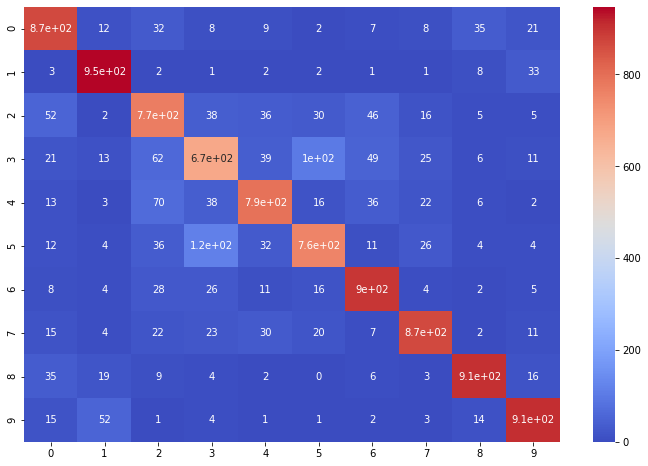

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='coolwarm')